# EXPLORATORY DATA ANALYSIS

### Importing the necessary dependencies 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('seaborn') 
np.set_printoptions(suppress=True)
import altair as alt
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import squarify


### Loading the Data 

In [2]:
df = pd.read_csv('ida_prepared.csv')

In [3]:
df.head(2)

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IDA,Due to IDA,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Credits Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date,Currency of Commitment_USD
0,2020-05-31,IDA04891,AFRICA,TD,Chad,Ministere des Finances et du Budget,Fully Repaid,0.750,USD,IRRIG. SATEGUI DERES,19239973.134,115014.515,0.000,19124958.619,19124958.619,0.000,0,0.000,0.000,0.000,0.000,0.000,1984-06-01,2023-12-01,1976-10-07,1976-08-10,1977-02-09,1987-06-30,1991-07-08,USD
1,2020-05-31,IDA07390,AFRICA,TD,Chad,Ministere des Finances et du Budget,Fully Repaid,0.750,USD,SAHELIAN ZONE PROJEC,4569493.619,0.000,0.000,4569493.619,4569493.619,0.000,0,0.000,0.000,0.000,0.000,0.000,1987-12-01,2027-06-01,1977-09-28,1977-09-06,1978-05-15,1987-06-30,1987-09-22,USD


####  Percentage of Loans according to Regions

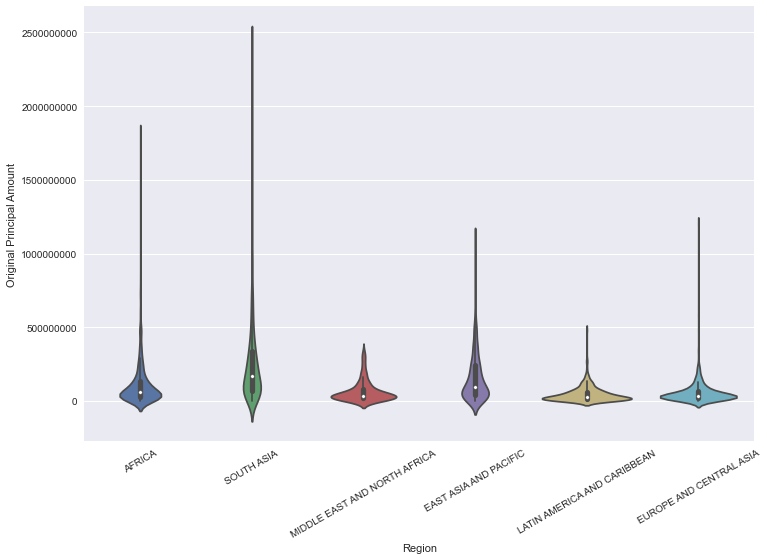

In [4]:
plt.figure(figsize =(12, 8))
fig= sns.violinplot(x= 'Region', y='Original Principal Amount', hue=None, 
                  data=df, order=None, hue_order=None, bw='scott',
                  cut=2, scale='area', scale_hue=True, gridsize=100, 
                  width=0.8, inner='box', split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=0.75,
                  ax=None)

fig.set_xticklabels(fig.get_xticklabels(),rotation=30)
fig.ticklabel_format(style='plain', axis='y')

In [5]:
fig_copy = fig.get_figure() 

fig_copy.savefig('./Plots/Total Loan per Region.png')

In [6]:
li = pd.DataFrame(df.groupby(['Region'])['Original Principal Amount'].sum())

In [7]:
li

,Original Principal Amount
Region,
AFRICA,342412863204.119
EAST ASIA AND PACIFIC,95919982487.531
EUROPE AND CENTRAL ASIA,31500795124.106
LATIN AMERICA AND CARIBBEAN,18847353340.030
MIDDLE EAST AND NORTH AFRICA,11277510252.735
SOUTH ASIA,250864449616.705


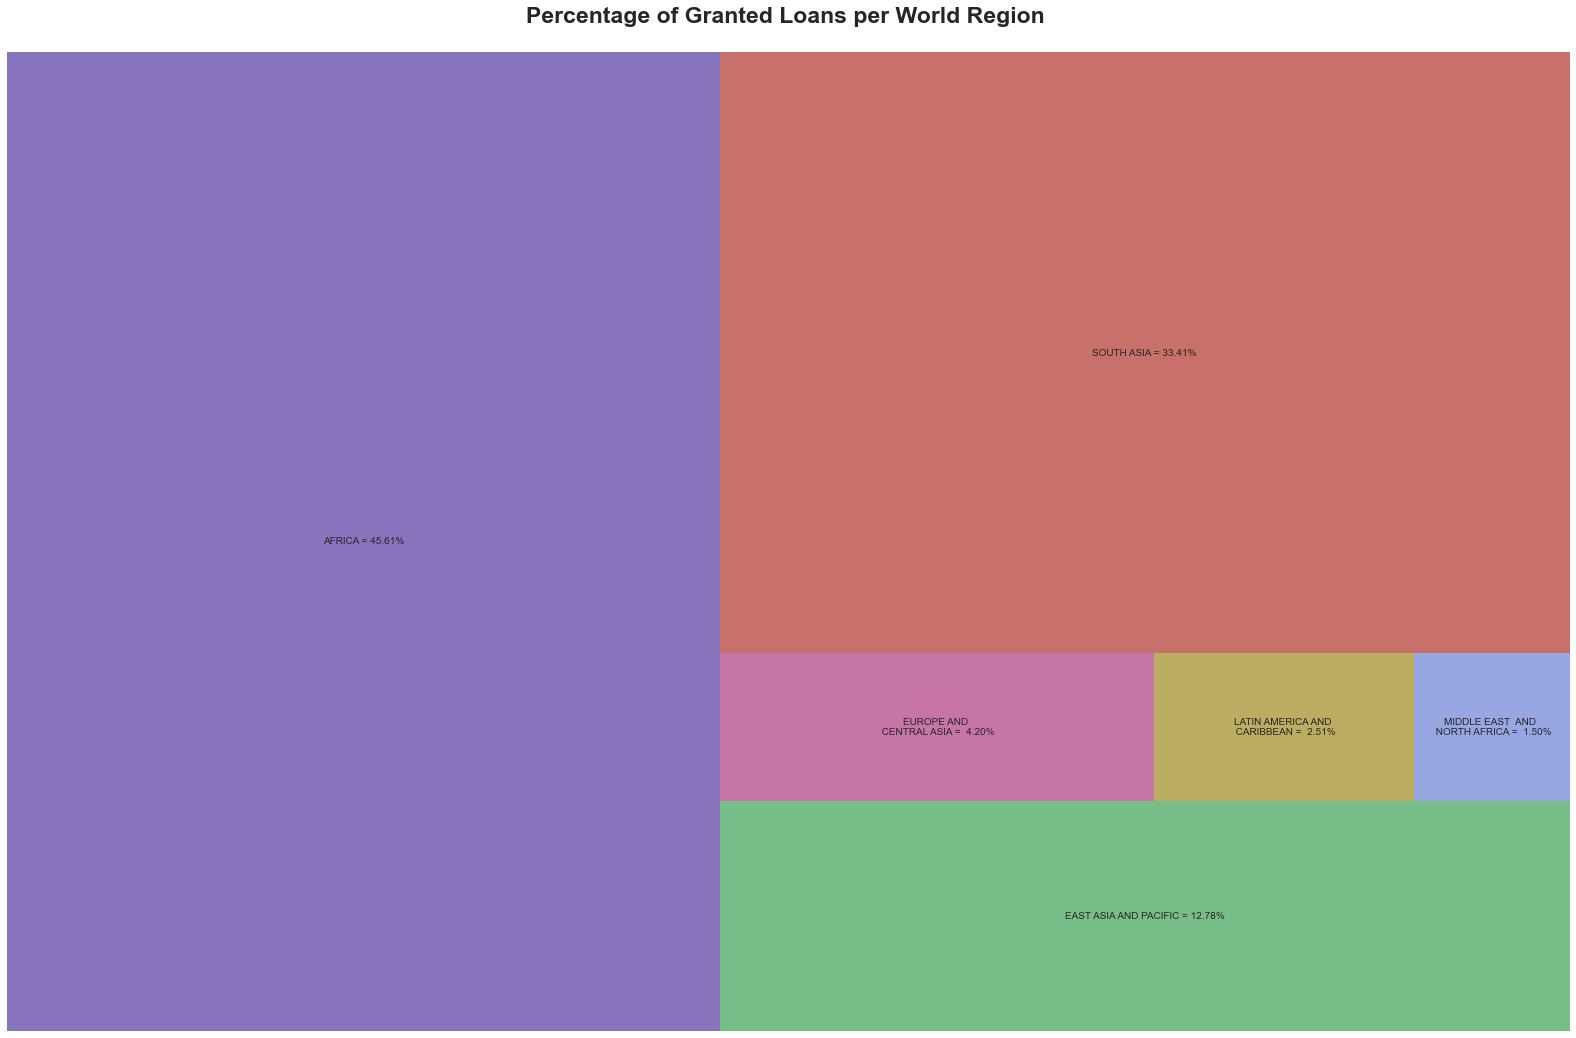

In [8]:
plt.figure(figsize =(28, 18))
data = pd.DataFrame({'Original Principal Amount':[342412863204.119,  95919982487.531,31500795124.106, 18847353340.030, 11277510252.735, 250864449616.705], 'Region':[
"AFRICA", "EAST ASIA AND PACIFIC", "EUROPE AND \n CENTRAL ASIA", "LATIN AMERICA AND \n CARIBBEAN", "MIDDLE EAST  AND \n NORTH AFRICA", "SOUTH ASIA" ] })

perc = [str('{:5.2f}'.format(i/data['Original Principal Amount'].sum()*100)) + "%" for i in data['Original Principal Amount']]
lbl = [el[0] + " = " + el[1] for el in zip(data['Region'], perc)]
fig1= squarify.plot(sizes=data['Original Principal Amount'], label=lbl, alpha=.8, 
                   color= ["#6a51ab",
                        "#56ae6a",
                        "#ba5292",
                        "#ad993c",
                        "#7c91da",
                        "#b94e45"] )
plt.axis('off')
plt.title("Percentage of Granted Loans per World Region \n ",fontsize=23,fontweight="bold")
plt.show()

In [9]:
fig1_copy = fig1.get_figure() 

fig1_copy.savefig('./Plots/Total Loan per Region.png')

### How much was borrowed from IDA per region?

Text(0.5, 1.0, 'Principal Amount borrowed per Region')

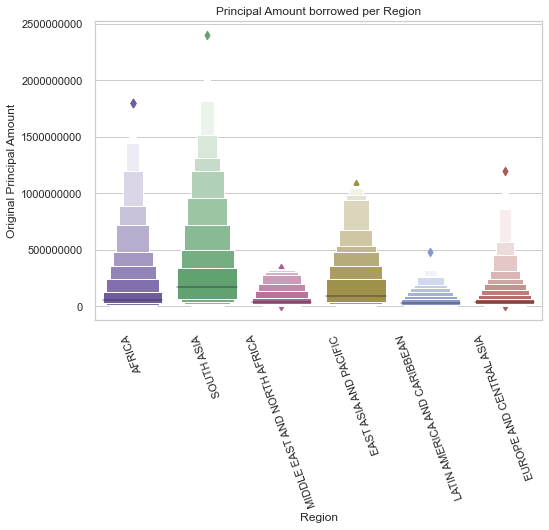

In [10]:
sns.set(style="whitegrid")

s= sns.boxenplot(x="Region", y="Original Principal Amount",
              palette= ["#6a51ab",
                        "#56ae6a",
                        "#ba5292",
                        "#ad993c",
                        "#7c91da",
                        "#b94e45"], order= None,
              scale="linear", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=110)
s.ticklabel_format(style='plain', axis='y')
s.set_title('Principal Amount borrowed per Region')

In [11]:
fig_copy = s.get_figure() 

fig_copy.savefig('./Plots/Principal Amount borrowed per Region.png')

### An Overview of the Credit Status per Region 

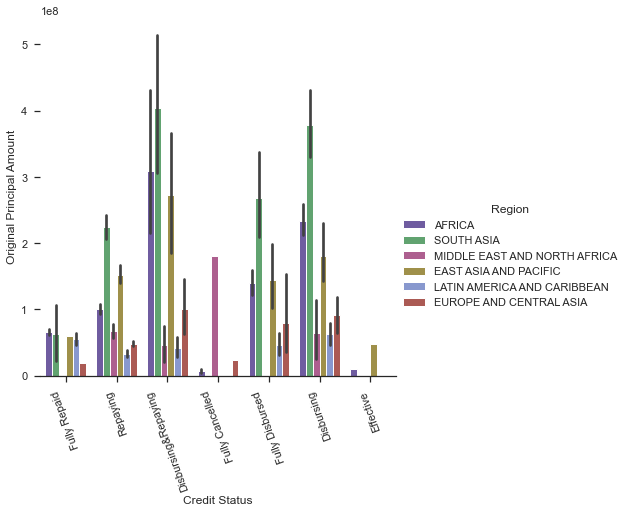

In [12]:
#sns.set(style="white")
sns.set(style="ticks")

g = sns.catplot(x="Credit Status", y="Original Principal Amount", 
                hue = "Region", data= df,
                height=6, kind="bar", palette=["#6a51ab",
                        "#56ae6a",
                        "#ba5292",
                        "#ad993c",
                        "#7c91da",
                        "#b94e45"])
g.despine(left=True)
g.set_xticklabels(rotation=110)
#g.ticklabel_format(style='plain', axis='y')
#g.set_title('Principal Amount borrowed per Region')


In [13]:
g.savefig('./Plots/Credit Status per Region.png')

### Which countries Borrowed frequently?

In [14]:
borrower = df.groupby(['Country', 'Original Principal Amount'])['Original Principal Amount'].sum()

In [15]:
borrower

Country      Original Principal Amount
Afghanistan  0.000                               0.000
             12024983.209                 12024983.209
             49061931.493                 49061931.493
             52909926.120                 52909926.120
             60124916.045                 60124916.045
                                              ...     
Zimbabwe     150312290.113               150312290.113
             155122283.396               155122283.396
             168349764.926               168349764.926
             300624580.225               300624580.225
             360749496.270               360749496.270
Name: Original Principal Amount, Length: 3888, dtype: float64


#### An Overview of the Credit Status 

In [16]:
import plotly.express as px

In [17]:
v = df.groupby('Credit Status')['Original Principal Amount'].sum()

In [25]:
data = dict(
    number=list(v),
    status=
v.keys())
fig = px.funnel(data, x='number', y='status', color = ["#a7dfe5",
"#e6b8b3",
"#9dc8ae",
"#d1bbdf",
"#d7dab7",
"#aac4e2",
"#acc2bd"])
fig.show()

### Time Series of Board pproval Date and Amount Approved

In [29]:
fig = px.line(df, x='Board Approval Date', y='Original Principal Amount')
fig.show()